# 1. Introduction

So, imagine this: you are on the hunt for a new smartphone, scrolling through Amazon's endless array of options. You're not just interested in what the specs say or what the manufacturers claim – you want to know what real users have to say. That's where the magic of customer reviews comes in!

Think about it, every review is a goldmine of insights waiting to be discovered. Are the users raving about the camera quality? or are they complaining about the battery life? Or perhaps, there is a hidden feature that no one is talking about (this is prevalent in our world as we really do not have the time to dig through the hooks and crannies of our smart phones). 

This project will dive into the world of Amazon phone reviews using python to unravel trends and  patterns through exploratory data analysis. We will engage in some data cleaning and wrangling, data exploration and answer some questions 😁. The dataset used in this project was sourced from data world. You can view the full dataset [here](https://data.world/opensnippets/amazon-mobile-phones-reviews).
Below are some questions that will be answered:

1- What is the top reviewed phone?

2- Which phone has the highest average review rating?

3- What percentage of reviews are verified purchases?

4- Is there a correlation between helpful_count and review_rating?

5- How does the distribution of review ratings vary across different phone brands?

6- Are there any trends in the frequency of reviews over time?

7- Do certain product features or styles correlate with higher review ratings?




### Data Description
a) **product:** The name or model of the product being reviewed (e.g., "iPhone 12 Pro Max").

b) **product_company:** The company or brand that manufactures the product (e.g., "Apple").

c) **profile_name:** The name or username of the person who wrote the review.

d) **review_title:** The title or headline of the review.

e) **review_rating:** The numerical rating assigned by the reviewer (e.g., on a scale of 1 to 5 stars).

f) **review_text:** The main body of the review, containing the reviewer's opinions, experiences, and feedback.

g) **helpful_count:** The number of users who found the review helpful or voted it as such.

h) **total_comments:** The total number of comments or replies on the review.

i) **review_country:** The country or region associated with the reviewer.

j) **reviewed_at:** The date and time when the review was posted.

k) **url:** The URL of the product page on Amazon.

l) **crawled_at:** The date and time when the review data was collected or crawled.

m) **id:** Unique identifier for the review.

n) **verified_purchase:** Indicates whether the reviewer is a verified purchaser of the product (e.g., "Yes" or "No").

o) **color:** Color variant of the product (if applicable).

p) **style_name:** Style or model variant of the product (if applicable).

q) **size_name:** Size variant of the product (if applicable).

r) **category:** The general category to which the product belongs (e.g., "Electronics").

s) **sub_category:** A more specific sub-category within the main category (e.g., "Smartphones").


In [1]:
# import the libraries required for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read the data
data = pd.read_json('amazon_one_plus_reviews.json')
print(data.head())

                                             product product_company  \
0  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
1  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
2  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
3  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   
4  OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Sto...         OnePlus   

      profile_name                   review_title       review_rating  \
0           Nikhil        *Read before you buy!!*  5.0 out of 5 stars   
1             Amit  Near to mid range  Perfection  5.0 out of 5 stars   
2        aishwarya                   Great price!  5.0 out of 5 stars   
3          vasu a.              Beast in OnePlus.  5.0 out of 5 stars   
4  Amazon Customer        Changed to Nord from 6t  5.0 out of 5 stars   

                                         review_text  \
0  \n  Yea..pre-ordered on 28 July, got it on 4 A...   
1  \n  Got it de

In [3]:
# get the descriptive statistics of the data
data.describe()

,total_comments
count,30612.000000
mean,0.072325
std,0.444049
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,24.000000


Looking from the data, it is obvious that it is kind of messy and requires it to be cleaned. Currently, there is only one numerical data as seen in the descriptive statistics table. There are a couple of columns (helpful_count, review rating) that would be more useful as numerical rather than objects. These would be worked upon.

# 2. Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product            30612 non-null  object        
 1   product_company    30612 non-null  object        
 2   profile_name       30612 non-null  object        
 3   review_title       30612 non-null  object        
 4   review_rating      30612 non-null  object        
 5   review_text        30612 non-null  object        
 6   helpful_count      30612 non-null  object        
 7   total_comments     30612 non-null  int64         
 8   review_country     30612 non-null  object        
 9   reviewed_at        30612 non-null  datetime64[ns]
 10  url                30612 non-null  object        
 11  crawled_at         30612 non-null  datetime64[ns]
 12  _id                30612 non-null  object        
 13  verified_purchase  30612 non-null  object        
 14  color 

There are no missing values in this dataset. However, we won't be needing the **"_id, url, crawled_at, and images"** columns as they are not useful for our analysis. For this reason, these will be dropped.

In [5]:
# drops the url, crawled_at, and images columns

data.drop(['_id', 'url', 'crawled_at', 'images'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product            30612 non-null  object        
 1   product_company    30612 non-null  object        
 2   profile_name       30612 non-null  object        
 3   review_title       30612 non-null  object        
 4   review_rating      30612 non-null  object        
 5   review_text        30612 non-null  object        
 6   helpful_count      30612 non-null  object        
 7   total_comments     30612 non-null  int64         
 8   review_country     30612 non-null  object        
 9   reviewed_at        30612 non-null  datetime64[ns]
 10  verified_purchase  30612 non-null  object        
 11  color              30612 non-null  object        
 12  style_name         30612 non-null  object        
 13  size_name          30612 non-null  object        
 14  catego

In [6]:
# check for duplicated data
data.duplicated().sum()

# drop duplicates
data.drop_duplicates(keep='first', inplace=True)

In [7]:
# check for missing values
data.isna().sum()

product              0
product_company      0
profile_name         0
review_title         0
review_rating        0
review_text          0
helpful_count        0
total_comments       0
review_country       0
reviewed_at          0
verified_purchase    0
color                0
style_name           0
size_name            0
category             0
sub_category         0
dtype: int64

###### Next, let find out the unique values and unique objects in each column.

In [8]:
# loop through each column and get unique values per column
for i in data.columns:
    print(f"Unique {i}'s count: {data[i].nunique()}")
    print(f"{data[i].unique()} \n")

Unique product's count: 3
['OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)'
 'Redmi Note 8 (Neptune Blue, 4GB RAM, 64GB Storage)'
 'Redmi Note 9 Pro (Aurora Blue, 4GB RAM, 64GB Storage) - Latest 8nm Snapdragon 720G & Alexa Hands-Free | 6 Months No Cost EMI'] 

Unique product_company's count: 2
['OnePlus' 'Redmi'] 

Unique profile_name's count: 23355
['Nikhil' 'Amit' 'aishwarya' ... 'winshot' 'Naveen Mahore' 'SREEKUMAR V'] 

Unique review_title's count: 17655
['*Read before you buy!!*' 'Near to mid range  Perfection' 'Great price!'
 ... 'Great but not satisfied for me'
 'WORST MARKETING TACTICS OF FLASH SALE OF REDMI AND AMAZON'
 'Camera quality is bad 👎'] 

Unique review_rating's count: 5
['5.0 out of 5 stars' '4.0 out of 5 stars' '1.0 out of 5 stars'
 '3.0 out of 5 stars' '2.0 out of 5 stars'] 

Unique review_text's count: 25010
['\n  Yea..pre-ordered on 28 July, got it on 4 August. Package was nice without any damage. So here is my first impression:'
 '\n  Got it delivered yeste

###### Convert the "review_rating" and "helpful_counts" columns to numerical data_types. Start by removing the phrases after the numbers

In [9]:
# remove the suffixes from the data

# This removes the first three word in the product and assigns them to another column
# Then moves the newly created column to the first position
data["products"] = data["product"].str.split().str[:3].str.join(sep=" ")
data.drop('product', axis=1, inplace=True)
first_col =data.pop('products')
data.insert(0, 'products', first_col)
data

data['review_rating'] = data['review_rating'].str.replace(' out of 5 stars', '')
data['review_rating'] = data['review_rating'].str.replace('.0', '')
data['helpful_count'] = data['helpful_count'].str.replace(' people found this helpful', '')
data['helpful_count'] = data['helpful_count'].str.replace(',', '')
data['helpful_count'].replace('One person found this helpful', '1', inplace=True)

print(data['review_rating'].unique())
print(data['helpful_count'].unique())
print(data['products'].unique())

# convert the data to numbers
data = data.astype({"review_rating": 'int64', "helpful_count": 'int64'})

print(data.info())

['5' '4' '1' '3' '2']
['721' '436' '322' '243' '109' '89' '66' '46' '45' '39' '31' '29' '23'
 '19' '18' '14' '13' '10' '12' '8' '9' '7' '6' '5' '3' '4' '2' '1' '0'
 '2848' '1494' '283' '185' '86' '59' '50' '36' '26' '447' '340' '270'
 '247' '197' '169' '163' '133' '105' '120' '85' '62' '47' '41' '33' '30'
 '42' '28' '15' '17' '32' '21' '25' '24' '16' '2430' '157' '83' '512'
 '203' '71' '11' '1665' '324' '505' '272' '259' '431' '201' '171' '135'
 '122' '141' '88' '82' '61' '60' '52' '34' '27' '22' '20' '64' '118' '65'
 '43' '161' '3778' '128' '80' '107' '40' '379' '275' '230' '51' '35' '964'
 '553' '423' '226' '210' '190' '57' '4550' '364' '263' '137' '79' '67'
 '58' '44' '48' '38' '213' '175' '293' '87']
['OnePlus Nord 5G' 'Redmi Note 8' 'Redmi Note 9']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30465 entries, 0 to 30611
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   products    

C:\Users\ABDULL~1\AppData\Local\Temp/ipykernel_30036/3143767592.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['review_rating'] = data['review_rating'].str.replace('.0', '')


In [10]:
data.describe()

,review_rating,helpful_count,total_comments
count,30465.000000,30465.000000,30465.000000
mean,3.998359,1.459905,0.064500
std,1.201227,44.200907,0.364806
min,1.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,0.000000,0.000000
max,5.000000,4550.000000,24.000000


In [11]:
# Convert the verified purchase column to Boolean

d = {'Verified Purchase': True, 'na': False}
data['verified_purchase']= data["verified_purchase"].replace(d)


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30465 entries, 0 to 30611
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   products           30465 non-null  object        
 1   product_company    30465 non-null  object        
 2   profile_name       30465 non-null  object        
 3   review_title       30465 non-null  object        
 4   review_rating      30465 non-null  int64         
 5   review_text        30465 non-null  object        
 6   helpful_count      30465 non-null  int64         
 7   total_comments     30465 non-null  int64         
 8   review_country     30465 non-null  object        
 9   reviewed_at        30465 non-null  datetime64[ns]
 10  verified_purchase  30465 non-null  bool          
 11  color              30465 non-null  object        
 12  style_name         30465 non-null  object        
 13  size_name          30465 non-null  object        
 14  catego

In [12]:
verified_percentage = (data['verified_purchase'].value_counts(normalize=True) * 100).round(2)
print(verified_percentage)

True     97.99
False     2.01
Name: verified_purchase, dtype: float64


# 3. Data Visualization
Here, we will try to answer the questions above and support them with visualizations:

#### 1. What is the top reviewed phone?

products
Redmi Note 8       13891
OnePlus Nord 5G     9416
Redmi Note 9        7158
dtype: int64


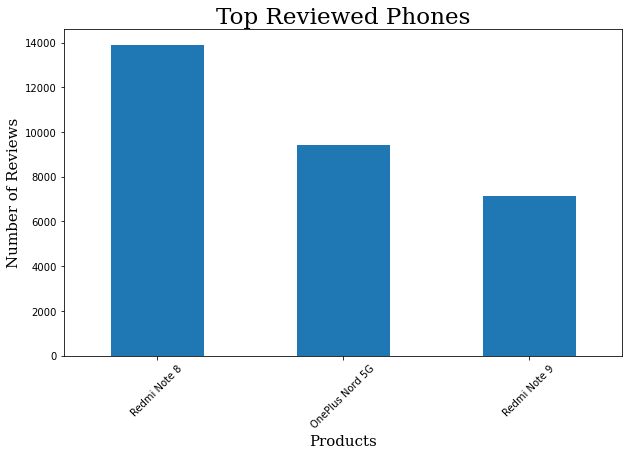

In [13]:
# Group by product and count the number of reviews
top_reviewed = data.groupby('products').size().sort_values(ascending=False)
print(top_reviewed)
#create a style
font1 = {'family':'serif','color':'black','size':23}
font2 = {'family':'serif','color':'black','size':15}

# Plotting
plt.figure(figsize=(10, 6))
top_reviewed.plot(kind='bar' )
plt.title('Top Reviewed Phones', fontdict = font1)
plt.xlabel('Products', fontdict = font2)
plt.ylabel('Number of Reviews', fontdict = font2)
plt.xticks(rotation=45)
plt.show()

**Answer:** The top reviewed phone is **_Redmi Note 8_**

#### 2. Which phone has the highest average review rating?

In [14]:
# Group by product and calculate the average review rating
avg_rating = data.groupby('products')['review_rating'].mean().sort_values(ascending=False)
print(avg_rating)


products
Redmi Note 9       4.097653
Redmi Note 8       3.991577
OnePlus Nord 5G    3.932880
Name: review_rating, dtype: float64


**Answer: Redmi Note 9** has the highest average rating with **4.10**

#### 3.2 Distribution of Review Rating

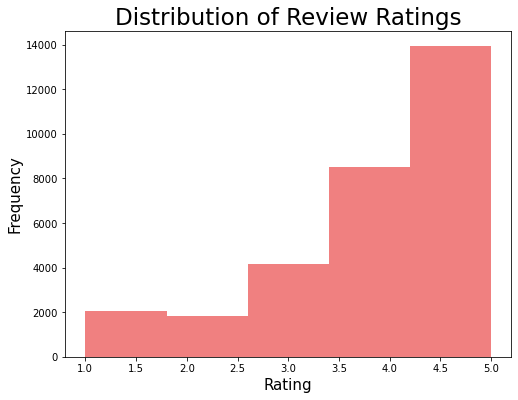

In [15]:
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(data['review_rating'], bins=5, color='lightcoral')
plt.title('Distribution of Review Ratings', size=23)
plt.xlabel('Rating', size=15)
plt.ylabel('Frequency', size=15)
plt.show()


#### 3. What percentage of reviews are verified purchases?

True     97.99
False     2.01
Name: verified_purchase, dtype: float64


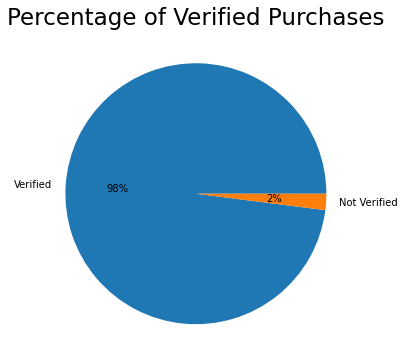

In [16]:
# Calculate the percentage of verified purchases
verified_percentage = (data['verified_purchase'].value_counts(normalize=True) * 100).round(2)

print(verified_percentage)


# Plotting
plt.figure(figsize=(6, 6))
plt.pie(verified_percentage, labels=['Verified', 'Not Verified'], autopct='%1.0f%%')
plt.title('Percentage of Verified Purchases', size=23)
plt.show()


**Answer: 98%** of the purchases were verified. 

#### 4. Is there a correlation between helpful_count and review_rating?

                   review_rating  helpful_count  total_comments  \
review_rating           1.000000      -0.027407       -0.279838   
helpful_count          -0.027407       1.000000        0.688402   
total_comments         -0.279838       0.688402        1.000000   
verified_purchase       0.055942       0.002246        0.022085   

                   verified_purchase  
review_rating               0.055942  
helpful_count               0.002246  
total_comments              0.022085  
verified_purchase           1.000000  


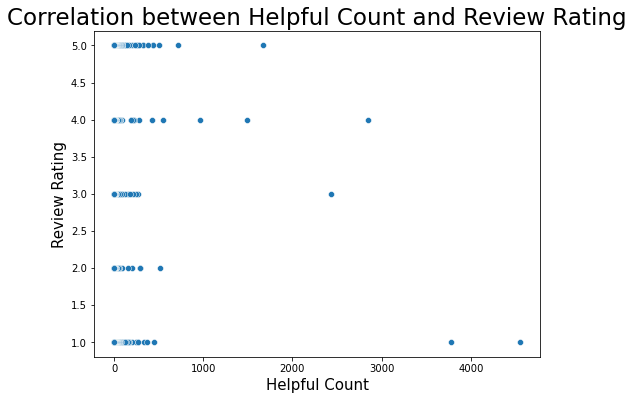

In [17]:
print(data.corr())

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='helpful_count', y='review_rating', data=data)
plt.title('Correlation between Helpful Count and Review Rating', size=23)
plt.xlabel('Helpful Count', size=15)
plt.ylabel('Review Rating', size=15)
plt.show()


**Answer:** As seen from the correlation matrix table and scatterplot, there appears **no correlation** between helpful count and review rating 

#### 5. How does the distribution of review ratings vary across different phone brands?

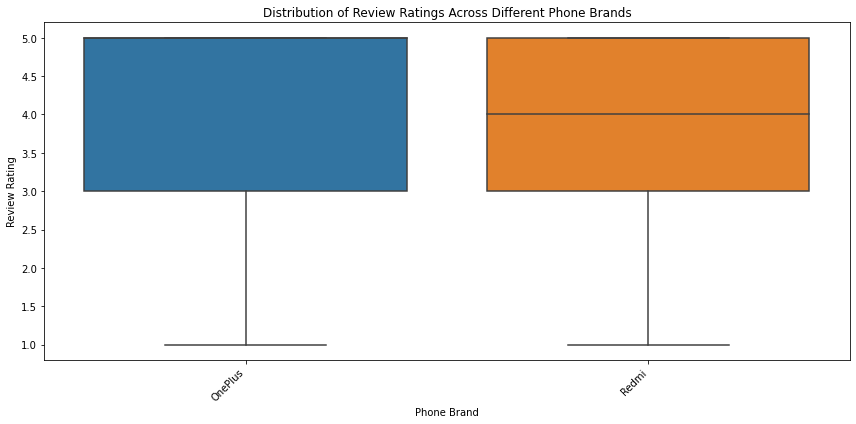

In [18]:
# Creates a boxplot to visualize the distribution of review ratings across different phone brands
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_company', y='review_rating', data=data)
plt.title('Distribution of Review Ratings Across Different Phone Brands')
plt.xlabel('Phone Brand')
plt.ylabel('Review Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 6. Are there any trends in the frequency of reviews over time?

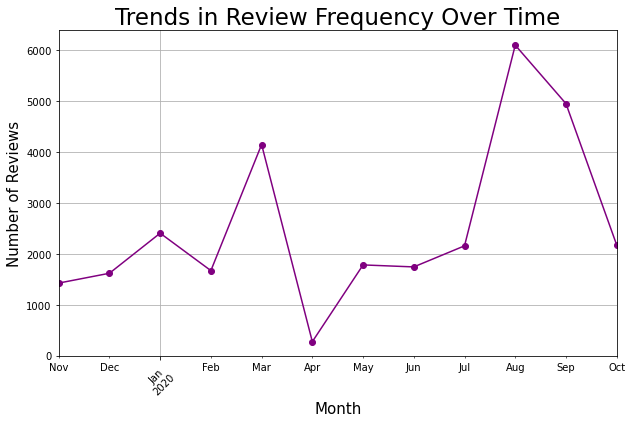

In [19]:
# Extract month from 'reviewed_at'
data['review_month'] = data['reviewed_at'].dt.to_period('M')

# Count reviews per month
review_trend = data.groupby('review_month').size()

# Plotting
plt.figure(figsize=(10, 6))
review_trend.plot(marker='o', color='purple')
plt.title('Trends in Review Frequency Over Time',size=23)
plt.xlabel('Month', size=15)
plt.ylabel('Number of Reviews', size=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 7. Do certain product features or styles correlate with higher review ratings?

Here, we will visualise the relationship between **review_rating and color**, and **review_rating and style name**.

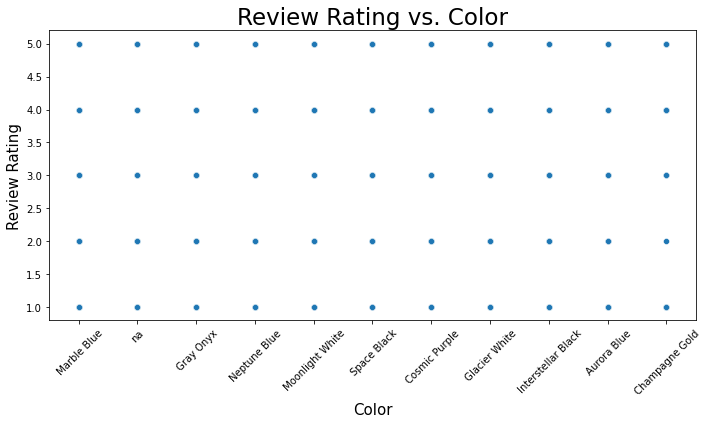

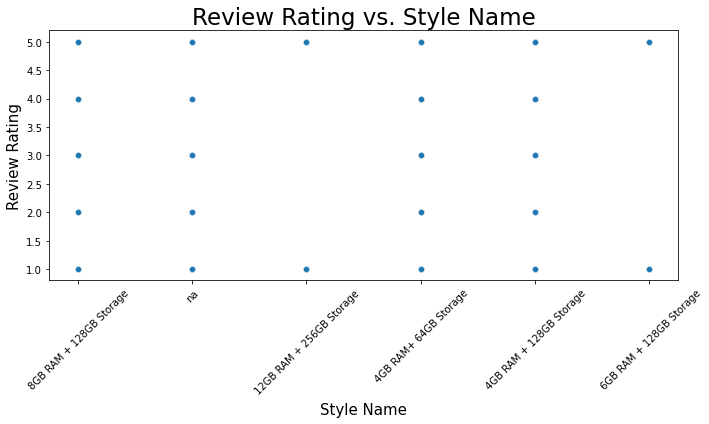

In [20]:
# review rating and color
plt.figure(figsize=(10, 6))
sns.scatterplot(x='color', y='review_rating', data=data)
plt.title('Review Rating vs. Color', size=23)
plt.xlabel('Color', size=15)
plt.ylabel('Review Rating', size=15)
plt.xticks(rotation=45)
plt.tight_layout()

# review rating and style name
plt.figure(figsize=(10, 6))
sns.scatterplot(x='style_name', y='review_rating', data=data)
plt.title('Review Rating vs. Style Name', size=23)
plt.xlabel('Style Name', size=15)
plt.ylabel('Review Rating', size=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Result
From the analysis conducted, we were able to answer the questions posed at the beginning.
Snapshots of the answers are below:

- The top reviewed phone is Redmi Note 8.
- Redmi Note 9 has the highest average rating with 4.10.
- 98% of the purchases were verified.
- There is no correlation between helpful count and review rating

In [21]:
# export the cleaned pdf
data.to_csv("phone_review.csv")